In [86]:
import sklearn
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.utils import shuffle

SEED = 42

In [110]:
import sklearn.preprocessing


DATA_PATH = "/Users/camille.hascoet/Documents/greenai/src/hale/sandbox/data/tracks.csv"


def get_data(path: str = DATA_PATH, dataset_size: int = 2000):
    df = pd.read_csv(path)
    X = df.drop(
        ["popularity", "id", "name", "artists", "id_artists", "release_date"], axis=1
    )
    y = df["popularity"]
    X = X.drop(
        ["mode", "valence", "key", "duration_ms", "speechiness", "liveness"], axis=1
    )
    X = X.drop(
        [
            "loudness",
            "energy",
            "explicit",
            "acousticness",
            "instrumentalness",
            "danceability",
        ],
        axis=1,
    )

    X_scaler = StandardScaler()

    X_shuffled, y_shuffled = shuffle(X, y, random_state=SEED)

    X, y = X_shuffled[:dataset_size], y_shuffled[:dataset_size]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = sklearn.preprocessing.MinMaxScaler()
    y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

    return X_train, X_test, y_train, y_test

In [111]:
X_train, X_test, y_train, y_test = get_data()

In [112]:
MLP_constant = MLPRegressor(
    hidden_layer_sizes=(40, 20),
    max_iter=10,
    random_state=SEED,
    learning_rate="constant",
    learning_rate_init=0.1,
    solver="sgd",
)

MLP_adaptive = MLPRegressor(
    hidden_layer_sizes=(40, 20),
    max_iter=10,
    random_state=SEED,
    learning_rate="adaptive",
    learning_rate_init=0.1,
    solver="sgd",
)

MLP_invscaling = MLPRegressor(
    hidden_layer_sizes=(40, 20),
    max_iter=10,
    random_state=SEED,
    learning_rate_init=0.1,
    learning_rate="invscaling",
    power_t=0.5,
    solver="sgd",
)

In [113]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mean_ab

constant_losses = []
adaptive_losses = []
invscaling_losses = []
classes = [str(i) for i in range(10)]
for _ in range(20):
    for i in range(len(X_train) // 100):
        try:
            X_batch = X_train[i * 100 : (i + 1) * 100]
            y_batch = y_train[i * 100 : (i + 1) * 100].ravel()
        except:
            X_batch = X_train[i * 100 :]
            y_batch = y_train[i * 100 :].ravel()

        MLP_constant.partial_fit(X_batch, y_batch)
        MLP_adaptive.partial_fit(X_batch, y_batch)
        MLP_invscaling.partial_fit(X_batch, y_batch)

        # test on test set
        y_pred_constant = MLP_constant.predict(X_test)
        y_pred_adaptive = MLP_adaptive.predict(X_test)
        y_pred_invscaling = MLP_invscaling.predict(X_test)

        constant_losses.append(mean_ab(y_test, y_pred_constant))
        adaptive_losses.append(mean_ab(y_test, y_pred_adaptive))
        invscaling_losses.append(mean_ab(y_test, y_pred_invscaling))

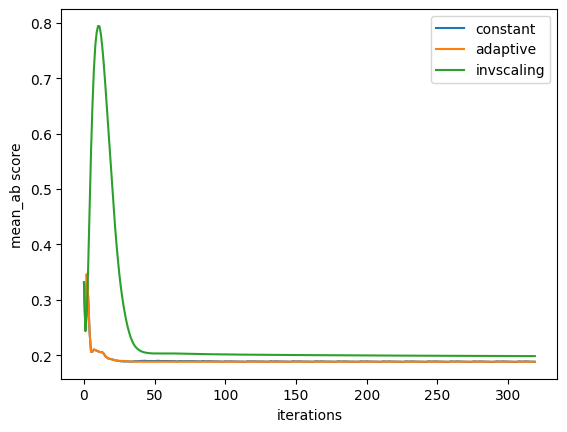

In [114]:
# print MLP loss over iterations
plt.plot(constant_losses, label="constant")
plt.plot(adaptive_losses, label="adaptive")
plt.plot(invscaling_losses, label="invscaling")
plt.xlabel("iterations")
plt.ylabel("mean_ab score")

plt.legend()
plt.show()

In [78]:
def load_MNIST():
    from sklearn.datasets import fetch_openml

    mnist = fetch_openml("mnist_784", version=1)
    X, y = mnist["data"], mnist["target"]
    return X, y


X, y = load_MNIST()

In [79]:
print(X.shape, y.shape)

X, y = shuffle(X, y, random_state=SEED)

X, y = X[:10000], y[:10000]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

(70000, 784) (70000,)


In [80]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [81]:
MLP_constant = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    random_state=SEED,
    learning_rate="constant",
    learning_rate_init=0.1,
)
MLP_adaptive = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    random_state=SEED,
    learning_rate="adaptive",
    learning_rate_init=0.1,
    solver="sgd",
)
MLP_invscaling = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    random_state=SEED,
    learning_rate="invscaling",
    learning_rate_init=0.1,
    power_t=0.5,
    solver="sgd",
)

In [82]:
constant_losses = []
adaptive_losses = []
invscaling_losses = []
classes = [str(i) for i in range(10)]
for _ in range(20):
    for i in range(len(X_train) // 100):
        try:
            X_batch = X_train[i * 100 : (i + 1) * 100]
            y_batch = y_train[i * 100 : (i + 1) * 100]
        except:
            X_batch = X_train[i * 100 :]
            y_batch = y_train[i * 100 :]

        MLP_constant.partial_fit(X_batch, y_batch, classes=classes)
        MLP_adaptive.partial_fit(X_batch, y_batch, classes=classes)
        MLP_invscaling.partial_fit(X_batch, y_batch, classes=classes)

        # test on test set
        y_pred_constant = MLP_constant.predict(X_test)
        y_pred_adaptive = MLP_adaptive.predict(X_test)
        y_pred_invscaling = MLP_invscaling.predict(X_test)

        constant_losses.append(accuracy_score(y_test, y_pred_constant))
        adaptive_losses.append(accuracy_score(y_test, y_pred_adaptive))
        invscaling_losses.append(accuracy_score(y_test, y_pred_invscaling))

In [83]:
print(y_pred_constant[:5], y_test[:5])

['1' '2' '6' '6' '4'] 32446    1
41998    7
47383    6
39495    6
64975    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


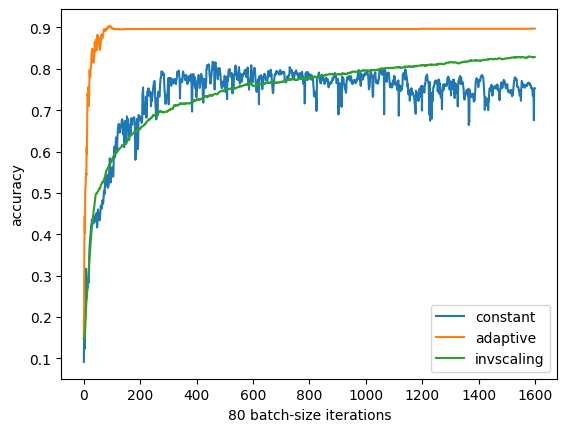

In [84]:
plt.figure()

plt.plot(constant_losses, label="constant")
plt.plot(adaptive_losses, label="adaptive")
plt.plot(invscaling_losses, label="invscaling")

plt.xlabel("{} batch-size iterations".format(len(X_train) // 100))

plt.ylabel("accuracy")

plt.legend()

plt.show()